<a href="https://colab.research.google.com/github/Ngare20/vigilant-octo-telegram/blob/main/House_Pricing_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [96]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [ ]:
data = pd.read_csv('/content/sample_data/california_housing_train.csv')
print(data)
data.head()

In [98]:
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:",len(object_cols))
 
int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:",len(num_cols))
 
fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:",len(fl_cols))

Categorical variables: 0
Integer variables: 0
Float variables: 9


<Axes: >

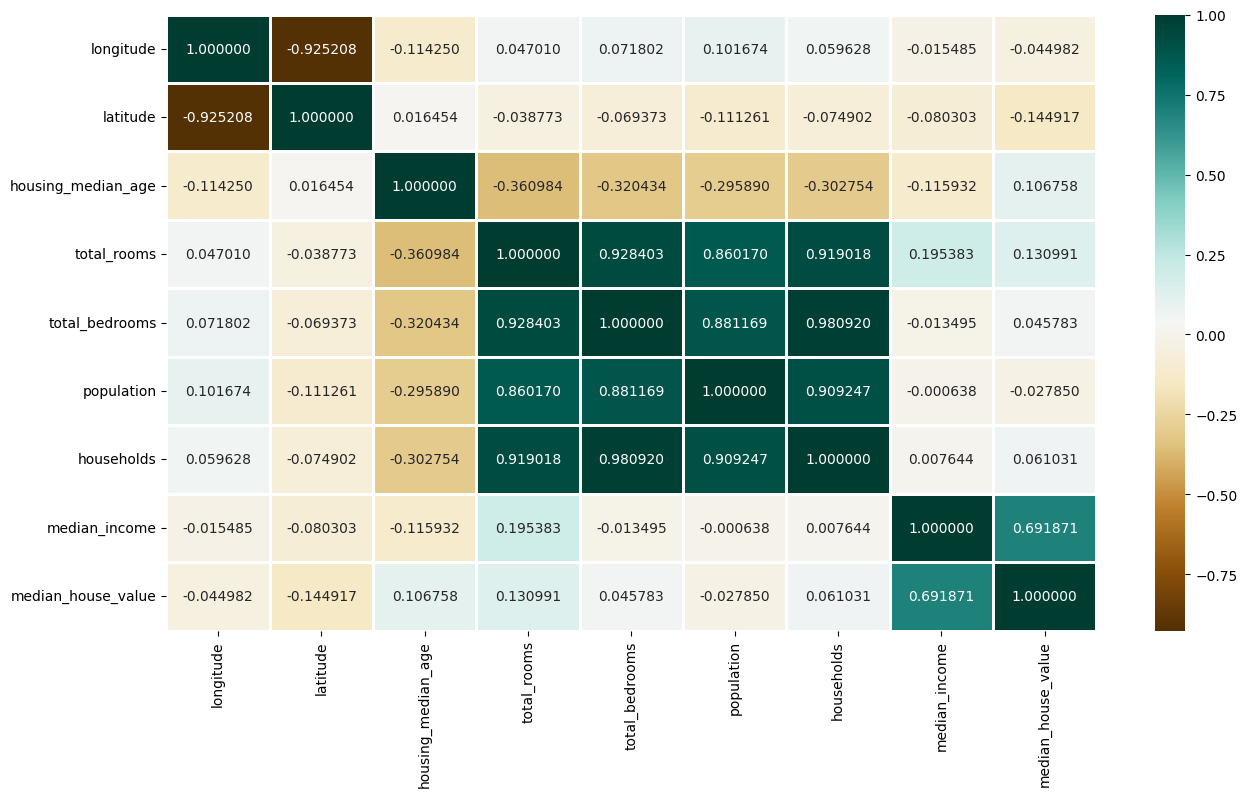

In [99]:
plt.figure(figsize=(15,8))
sns.heatmap(data.corr(),
           cmap = 'BrBG',
            fmt = '2f',
            linewidths = 2,
            annot = True)         

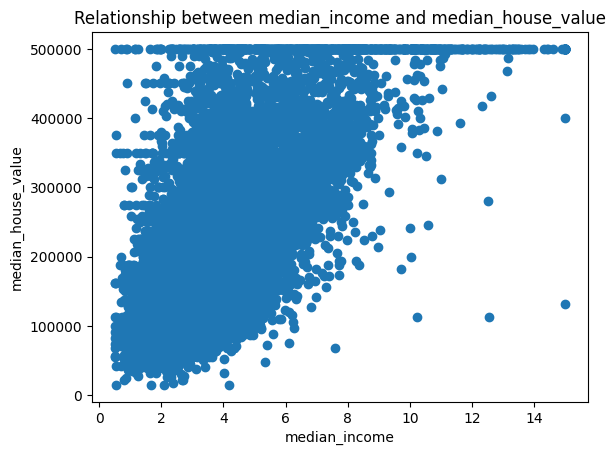

In [108]:
plt.scatter(data['median_income'],data['median_house_value'])
plt.xlabel('median_income')
plt.ylabel('median_house_value')
plt.title('Relationship between median_income and median_house_value')
plt.show()

In [101]:
from sklearn.model_selection import train_test_split
x=data.drop(['median_house_value'], axis=1)
y=data['median_house_value']
print(x)
print(y)

       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  
0   

In [102]:
x_train, x_test, y_train, y_test=train_test_split(x,y, test_size=0.4, train_size=0.6, random_state=0)
train_data=x_train.join(y_train)
print(data)


       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0        -114.31     34.19                15.0       5612.0          1283.0   
1        -114.47     34.40                19.0       7650.0          1901.0   
2        -114.56     33.69                17.0        720.0           174.0   
3        -114.57     33.64                14.0       1501.0           337.0   
4        -114.57     33.57                20.0       1454.0           326.0   
...          ...       ...                 ...          ...             ...   
16995    -124.26     40.58                52.0       2217.0           394.0   
16996    -124.27     40.69                36.0       2349.0           528.0   
16997    -124.30     41.84                17.0       2677.0           531.0   
16998    -124.30     41.80                19.0       2672.0           552.0   
16999    -124.35     40.54                52.0       1820.0           300.0   

       population  households  median_income  media

array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

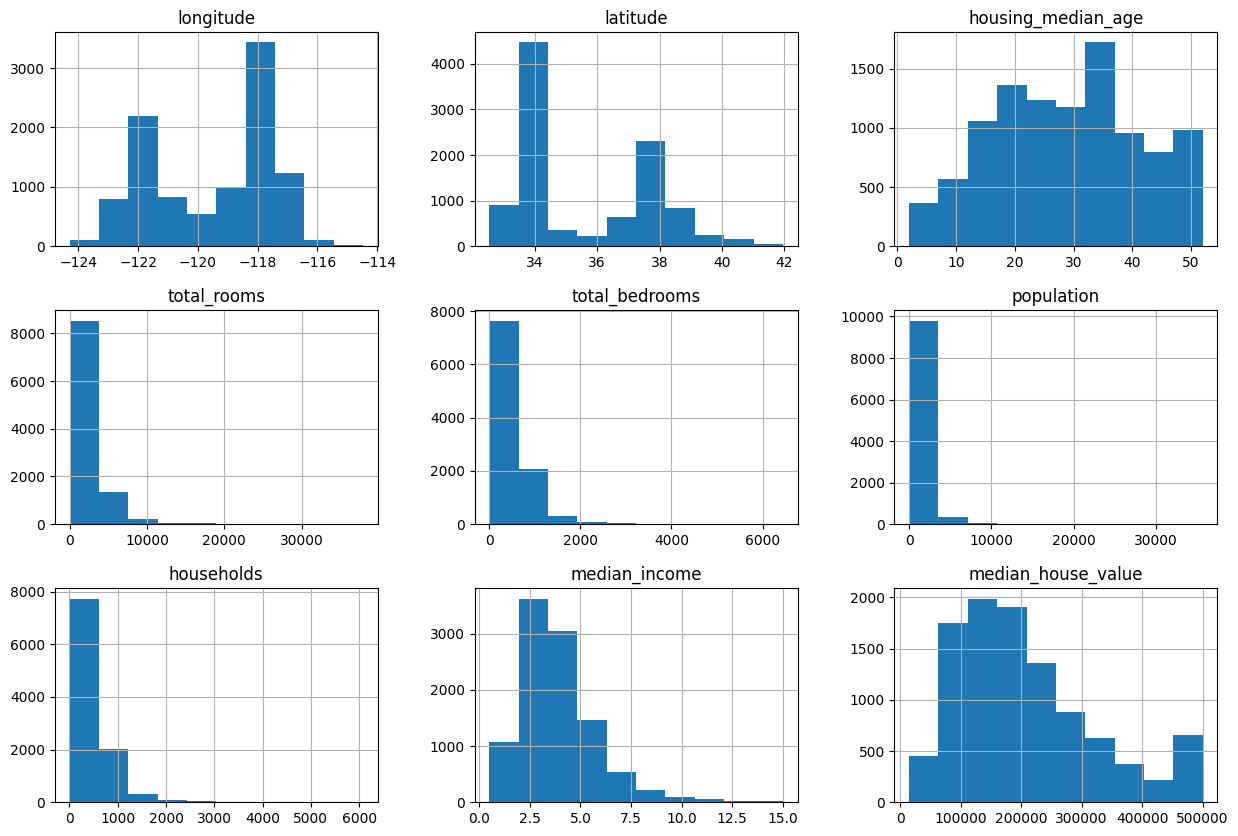

In [103]:
train_data.hist(figsize=(15,10))

In [104]:
from sklearn import  svm
from sklearn.svm import SVC
from sklearn.metrics import mean_absolute_percentage_error

model_SVR = svm.SVR()
model_SVR.fit(x_train, y_train)
y_pred = model_SVR.predict(x_train)
print(mean_absolute_percentage_error(y_train,y_pred))

0.5365247594434799


In [105]:
from sklearn.ensemble import RandomForestRegressor
model_RFR = RandomForestRegressor()
model_RFR.fit(x_train,y_train)
model_RFR.score(x_train,y_train)

0.9734725700733247

In [106]:
from numpy.ma.core import mean
from sklearn.linear_model import LinearRegression
model_LR= LinearRegression()
model_LR.fit(x_train,y_train)
y_pred=model_LR.predict(x_train)
print(mean_absolute_percentage_error(y_train,y_pred))

0.30460958635485913
